In [ ]:
import tensorflow as tf

In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

--2022-09-08 21:11:40--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.68.128, 142.250.4.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.68.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  70.8MB/s    in 1.5s    

2022-09-08 21:11:42 (70.8 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
zip_ref=zipfile.ZipFile("/content/pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import numpy as np
import pandas as pd

In [ ]:
def view_random_image(target_dir,target_class):
  target_folder=target_dir + "/"+ target_class #target dizinin altinda ki image git
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)

  img=mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"image shape: {img.shape}")
  return img

['1038357.jpg']
image shape: (512, 287, 3)


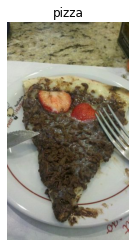

In [ ]:
img=view_random_image(target_dir="/content/pizza_steak/train",
                      target_class="pizza")

In [ ]:
img.max()

255

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#datayi islemek icin 

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255.0)
valid_datagen=ImageDataGenerator(rescale=1./255.0)

train_dir="/content/pizza_steak/train"
valid_dir="/content/pizza_steak/test"

train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=21)

valid_data=valid_datagen.flow_from_directory(directory=valid_dir,
                                             batch_size=32,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             seed=21)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model=tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    
    tf.keras.layers.Conv2D(filters=10,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")

])

In [ ]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

In [ ]:
history=model.fit(train_data,
                  epochs=10,
                  validation_data=valid_data)

Epoch 1/10
47/47 [==============================] - 96s 2s/step - loss: 1.6119 - accuracy: 0.4947 - val_loss: 1.3055 - val_accuracy: 0.5000
Epoch 2/10
47/47 [==============================] - 96s 2s/step - loss: 1.0633 - accuracy: 0.5000 - val_loss: 0.8658 - val_accuracy: 0.5000
Epoch 3/10
47/47 [==============================] - 96s 2s/step - loss: 0.7717 - accuracy: 0.5000 - val_loss: 0.7130 - val_accuracy: 0.5000
Epoch 4/10
47/47 [==============================] - 98s 2s/step - loss: 0.7017 - accuracy: 0.5000 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 5/10
47/47 [==============================] - 102s 2s/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/10
47/47 [==============================] - 100s 2s/step - loss: 0.6932 - accuracy: 0.5053 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/10
47/47 [==============================] - 98s 2s/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 8/10
47/47 [

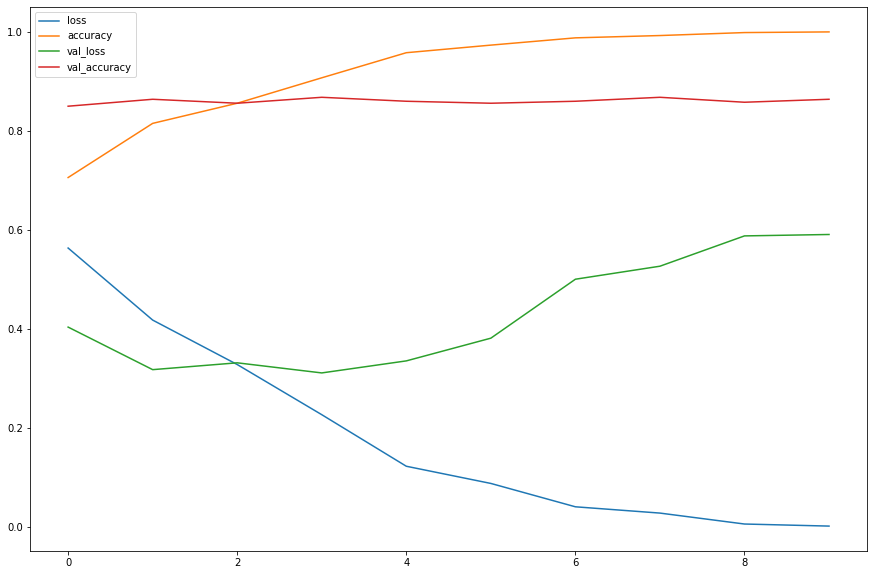

In [ ]:
pd.DataFrame(history.history).plot(figsize=(15,10))

In [ ]:
train_datagen_augmented=ImageDataGenerator(rescale=1./255.0,
                                 rotation_range=0.5,
                                 shear_range=0.3,
                                 zoom_range=0.2,
                                 width_shift_range=0.2,
                                 height_shift_range=0.4,
                                 horizontal_flip=True)

In [ ]:
train_datagen_augmented=train_datagen_augmented.flow_from_directory(directory=train_dir,
                                                                    target_size=(224,224),
                                                                    batch_size=32,
                                                                    class_mode="binary")

Found 1500 images belonging to 2 classes.


In [ ]:
augmented_images,augmented_labels=train_datagen_augmented.next()

In [ ]:
augmented_images.shape

(32, 224, 224, 3)

In [ ]:
augmented_labels.shape

(32,)

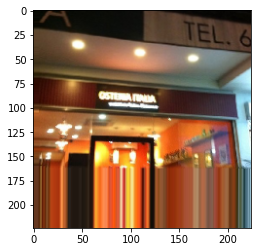

In [ ]:
plt.imshow(augmented_images[0])

#Multiclass Classification

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

--2022-09-10 20:13:44--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.128, 108.177.120.128, 142.250.159.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   296MB/s    in 1.7s    

2022-09-10 20:13:46 (296 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
zip_ref = zipfile.ZipFile("/content/10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

In [ ]:
import os # liste icinde tupple döner


for dirpath, dirnames, filenames in os.walk("/content/10_food_classes_all_data"): #hangi dizinde gezineceignin adresi verilit
  print(f"There are {len(dirnames)} directory and {len(filenames)} images in {dirpath}")


There are 2 directory and 0 images in /content/10_food_classes_all_data
There are 10 directory and 0 images in /content/10_food_classes_all_data/test
There are 0 directory and 250 images in /content/10_food_classes_all_data/test/hamburger
There are 0 directory and 250 images in /content/10_food_classes_all_data/test/grilled_salmon
There are 0 directory and 250 images in /content/10_food_classes_all_data/test/ice_cream
There are 0 directory and 250 images in /content/10_food_classes_all_data/test/steak
There are 0 directory and 250 images in /content/10_food_classes_all_data/test/fried_rice
There are 0 directory and 250 images in /content/10_food_classes_all_data/test/pizza
There are 0 directory and 250 images in /content/10_food_classes_all_data/test/chicken_curry
There are 0 directory and 250 images in /content/10_food_classes_all_data/test/ramen
There are 0 directory and 250 images in /content/10_food_classes_all_data/test/sushi
There are 0 directory and 250 images in /content/10_foo

In [ ]:
train_dir = "/content/10_food_classes_all_data/train"
test_dir = "/content/10_food_classes_all_data/test"

In [ ]:
import pathlib 
import numpy as np
#path'e ulasalim
data_dir = pathlib.Path(train_dir)

#pathlerdeki isimlere ulasalim
class_names = np.array([item.name for item in data_dir.glob("*")])
class_names

array(['hamburger', 'grilled_salmon', 'ice_cream', 'steak', 'fried_rice',
       'pizza', 'chicken_curry', 'ramen', 'sushi', 'chicken_wings'],
      dtype='<U14')

In [ ]:
def view_random_image(target_dir,target_class):
  target_folder=target_dir + "/"+ target_class #target dizinin altinda ki image git
  random_image=random.sample(os.listdir(target_folder),1)
  print(random_image)

  img=mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"image shape: {img.shape}")
  return img

['1157438.jpg']
image shape: (512, 512, 3)


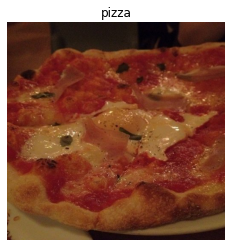

In [ ]:
import random
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import numpy as np
import pandas as pd

img =  view_random_image(train_dir, random.choice(class_names))

#Preprocessing data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1/255.0)
test_data_gen = ImageDataGenerator(rescale=1/255.0)

In [ ]:
train_data = train_data_gen.flow_from_directory(train_dir, 
                                                target_size = (224,224),
                                                class_mode = "categorical",
                                                batch_size = 32)

valid_data = test_data_gen.flow_from_directory(test_dir, 
                                                target_size = (224,224),
                                                class_mode = "categorical",
                                                batch_size = 32)


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
X, y = train_data[1]


array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

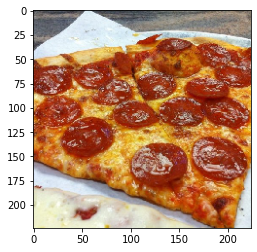

In [ ]:
plt.imshow(X[11])
y[11]

# creating model

In [ ]:
import tensorflow as tf
tf.random.set_seed(21)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(128, 3, activation="relu", input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(128,3,activation="relu"),
    tf.keras.layers.MaxPool2D(3), #3x3lük kernel al
    
    tf.keras.layers.Conv2D(64, 3, activation="relu"),
    tf.keras.layers.Conv2D(64,3,activation="relu"),
    tf.keras.layers.MaxPool2D(3), #3x3lük kernel al
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation="softmax")
])

In [ ]:
model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = tf.keras.optimizers.Adam(),
              metrics= ["accuracy"])

In [ ]:
history = model.fit(train_data,
                    epochs = 10,
                    validation_data = (valid_data))

Epoch 1/10
235/235 [==============================] - 99s 399ms/step - loss: 2.1532 - accuracy: 0.2092 - val_loss: 2.0168 - val_accuracy: 0.2780
Epoch 2/10
235/235 [==============================] - 83s 354ms/step - loss: 1.9277 - accuracy: 0.3255 - val_loss: 1.8357 - val_accuracy: 0.3584
Epoch 3/10
235/235 [==============================] - 83s 353ms/step - loss: 1.7455 - accuracy: 0.4007 - val_loss: 1.7653 - val_accuracy: 0.3904
Epoch 4/10
235/235 [==============================] - 84s 356ms/step - loss: 1.4953 - accuracy: 0.4953 - val_loss: 1.7131 - val_accuracy: 0.4148
Epoch 5/10
235/235 [==============================] - 83s 353ms/step - loss: 1.1239 - accuracy: 0.6275 - val_loss: 1.9615 - val_accuracy: 0.3872
Epoch 6/10
235/235 [==============================] - 83s 354ms/step - loss: 0.6600 - accuracy: 0.7805 - val_loss: 2.6042 - val_accuracy: 0.3840
Epoch 7/10
235/235 [==============================] - 83s 354ms/step - loss: 0.3294 - accuracy: 0.8932 - val_loss: 3.2788 - val_ac

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 128)     3584      
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 128)     147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 73, 73, 128)      0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 71, 64)        73792     
                                                                 
 conv2d_7 (Conv2D)           (None, 69, 69, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                  

In [ ]:
import pandas as pandas
plt.figure(figsize=(15,10))
pd.DataFrame(history.history).plot()

#Transferlearning

In [ ]:
import tensorflow_hub as hub

##resnet

In [ ]:
model_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"
resnet_layer = hub.KerasLayer(model_url, trainable=False)

In [ ]:
model = tf.keras.Sequential([
    resnet_layer,
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = "adam",
              metrics = ["accuracy"])

In [ ]:
history = model.fit(
    train_data,
    epochs = 10,
    validation_data = valid_data)

Epoch 1/10
235/235 [==============================] - 52s 220ms/step - loss: 0.1661 - accuracy: 0.9605 - val_loss: 0.5208 - val_accuracy: 0.8348
Epoch 2/10
235/235 [==============================] - 52s 220ms/step - loss: 0.1557 - accuracy: 0.9623 - val_loss: 0.5167 - val_accuracy: 0.8436
Epoch 3/10
235/235 [==============================] - 51s 219ms/step - loss: 0.1414 - accuracy: 0.9664 - val_loss: 0.5268 - val_accuracy: 0.8392
Epoch 4/10
235/235 [==============================] - 51s 218ms/step - loss: 0.1286 - accuracy: 0.9725 - val_loss: 0.5287 - val_accuracy: 0.8440
Epoch 5/10
235/235 [==============================] - 51s 218ms/step - loss: 0.1177 - accuracy: 0.9783 - val_loss: 0.5494 - val_accuracy: 0.8376
Epoch 6/10
235/235 [==============================] - 51s 218ms/step - loss: 0.1086 - accuracy: 0.9791 - val_loss: 0.5443 - val_accuracy: 0.8440
Epoch 7/10
235/235 [==============================] - 51s 218ms/step - loss: 0.0989 - accuracy: 0.9821 - val_loss: 0.5490 - val_ac

##transferlearning_ EfficientNet

In [ ]:
model_eff_url = "https://tfhub.dev/google/efficientnet/b6/feature-vector/1"
eff_layer = hub.KerasLayer(model_eff_url, trainable=False)

In [ ]:
model = tf.keras.Sequential([
    eff_layer,
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = "adam",
              metrics = ["accuracy"])

In [ ]:
history_eff = model.fit(
    train_data,
    epochs = 10,
    validation_data = valid_data)

Epoch 1/10
235/235 [==============================] - 99s 386ms/step - loss: 0.7704 - accuracy: 0.7769 - val_loss: 0.4235 - val_accuracy: 0.8724
Epoch 2/10
235/235 [==============================] - 86s 365ms/step - loss: 0.4729 - accuracy: 0.8497 - val_loss: 0.3572 - val_accuracy: 0.8872
Epoch 3/10
235/235 [==============================] - 86s 365ms/step - loss: 0.4097 - accuracy: 0.8725 - val_loss: 0.3374 - val_accuracy: 0.8924
Epoch 4/10
235/235 [==============================] - 86s 364ms/step - loss: 0.3699 - accuracy: 0.8844 - val_loss: 0.3161 - val_accuracy: 0.9024
Epoch 5/10
235/235 [==============================] - 86s 365ms/step - loss: 0.3387 - accuracy: 0.8965 - val_loss: 0.3096 - val_accuracy: 0.9024
Epoch 6/10
235/235 [==============================] - 86s 365ms/step - loss: 0.3152 - accuracy: 0.9053 - val_loss: 0.2994 - val_accuracy: 0.9072
Epoch 7/10
235/235 [==============================] - 86s 365ms/step - loss: 0.2944 - accuracy: 0.9119 - val_loss: 0.3000 - val_ac

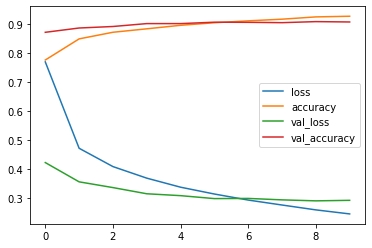

In [ ]:
pd.DataFrame(history_eff.history).plot()

## transferlearning mobilenet

In [ ]:
model_mobilnet_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_100_192/quantops/feature_vector/3"
vgg_layer = hub.KerasLayer(model_mobilnet_url, trainable=False)

model = tf.keras.Sequential([
    vgg_layer,
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss = tf.keras.losses.categorical_crossentropy,
              optimizer = "adam",
              metrics = ["accuracy"])

In [ ]:
history_vgg = model.fit(
    train_data,
    epochs = 10,
    validation_data = valid_data)

Epoch 1/10
235/235 [==============================] - 52s 214ms/step - loss: 1.0678 - accuracy: 0.6535 - val_loss: 0.5405 - val_accuracy: 0.8264
Epoch 2/10
235/235 [==============================] - 50s 211ms/step - loss: 0.5577 - accuracy: 0.8237 - val_loss: 0.4457 - val_accuracy: 0.8560
Epoch 3/10
235/235 [==============================] - 49s 210ms/step - loss: 0.4579 - accuracy: 0.8515 - val_loss: 0.4303 - val_accuracy: 0.8632
Epoch 4/10
235/235 [==============================] - 58s 248ms/step - loss: 0.3965 - accuracy: 0.8755 - val_loss: 0.3990 - val_accuracy: 0.8728
Epoch 5/10
235/235 [==============================] - 50s 213ms/step - loss: 0.3546 - accuracy: 0.8869 - val_loss: 0.3886 - val_accuracy: 0.8748
Epoch 6/10
235/235 [==============================] - 55s 235ms/step - loss: 0.3122 - accuracy: 0.9039 - val_loss: 0.3735 - val_accuracy: 0.8804
Epoch 7/10
235/235 [==============================] - 50s 212ms/step - loss: 0.2879 - accuracy: 0.9131 - val_loss: 0.3884 - val_ac

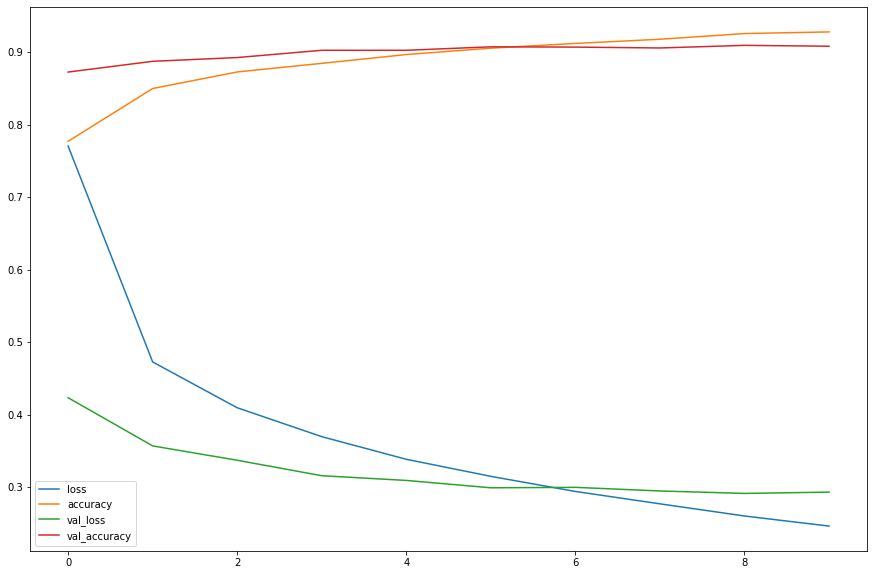

In [ ]:
pd.DataFrame(history_eff.history).plot(figsize=(15,10))